## Possiveis formatos para expor os datasets

### Dependencias

In [1]:
pip install datasets python-dotenv sqlalchemy

  Using cached datasets-4.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached huggingface_hub-0.35.3-py3-none-any.whl.metadata (14 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.4 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached hf_xet-1.1.10-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.7 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
Using cached datasets-4.2.0-py3-none-any.whl (

In [2]:
from datasets import Dataset

ds = Dataset.from_dict({
    "book": ["As aventuras de Alfredo Godoy", "Lembranças de uma lambida."],
    "category": ["Romance", "Terror"]
})

print(ds[0])


/home/raulg/.pyenv/versions/vercel2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'book': 'As aventuras de Alfredo Godoy', 'category': 'Romance'}


### Um simples dictionary tem o mesmo efeito que um dataset, mas sem as funcionalidades adicionais.
### que de qualquer forma não são expostas na API.

In [3]:

ds = [
      {
        "book": "As aventuras de Alfredo Godoy",
        "category": "Romance"
      },
      {
        "book": "Lembranças de uma lambida.",
        "category": "Terror"
      }
     ]

print(ds[0])

{'book': 'As aventuras de Alfredo Godoy', 'category': 'Romance'}


## Vamos tentar gerar um dataset a partir da base local.

### Inicializa o sqlalchemy pra ficar mais parecido com o que vamos fazer na API

In [4]:
from sqlalchemy import create_engine
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import sessionmaker
from dotenv import load_dotenv
import os

# Inicializa variáveis de ambiente
load_dotenv(dotenv_path="../.env")

SQLALCHEMY_DATABASE_URL = os.getenv(
    "DATABASE_URL", "postgresql://localhost/ideal_broccoli"
)

engine = create_engine(SQLALCHEMY_DATABASE_URL)

SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)

Base = declarative_base()


def get_db():
    db = SessionLocal()
    try:
        yield db
    finally:
        db.close()

In [20]:
from sqlalchemy import text
books = get_db().__next__().execute(text("select CAST(b.price * 100 AS INTEGER),b.rating, c.id from books b inner join categories c on b.category_id = c.id")).all()
books

[(4517, 2, 153),
 (4943, 4, 153),
 (4887, 3, 153),
 (3694, 2, 153),
 (3733, 3, 153),
 (4434, 2, 153),
 (3054, 1, 153),
 (5688, 4, 153),
 (2321, 1, 153),
 (3895, 3, 153),
 (2608, 5, 153),
 (4782, 4, 154),
 (1963, 1, 154),
 (5650, 4, 154),
 (1664, 1, 154),
 (4410, 4, 154),
 (5421, 2, 154),
 (1392, 1, 154),
 (1069, 1, 154),
 (4835, 5, 154),
 (1673, 2, 154),
 (2680, 3, 154),
 (5436, 4, 154),
 (3528, 3, 154),
 (1184, 1, 154),
 (5948, 3, 154),
 (2726, 2, 154),
 (1371, 3, 154),
 (2537, 5, 154),
 (5230, 5, 154),
 (2089, 4, 154),
 (2480, 4, 154),
 (3838, 2, 154),
 (2305, 5, 154),
 (4345, 3, 154),
 (1921, 1, 154),
 (2540, 3, 154),
 (2472, 2, 154),
 (5770, 4, 154),
 (1229, 5, 154),
 (1585, 3, 154),
 (2030, 3, 154),
 (5398, 1, 154),
 (5374, 1, 155),
 (2969, 3, 155),
 (5553, 5, 155),
 (3695, 1, 155),
 (3025, 5, 155),
 (2808, 4, 155),
 (4584, 3, 155),
 (2055, 2, 155),
 (3901, 4, 155),
 (1728, 2, 155),
 (1662, 3, 155),
 (3734, 1, 155),
 (3297, 4, 155),
 (2832, 5, 155),
 (2677, 1, 155),
 (2107, 5, 155

### Agora que consigo pegar os dados, vamos transformar em um dataset
### usando o skikit e o pandas

In [ ]:
pip install scikit-learn==1.7.2 pandas==2.3.3 joblib==1.5.2 numpy==2.3.4


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carrega os dados do banco de dados para um DataFrame do pandas
# b.title, b.price,b.rating, b.available, c.name 
df_rating = pd.DataFrame(books, columns=["price", "rating", "category"])
X_rating = df_rating.drop('rating', axis=1)
y_rating = df_rating['rating']

df_price = pd.DataFrame(books, columns=["price", "rating", "category"])
X_price = df_price.drop('price', axis=1)
y_price = df_price['price']

# Exemplo de divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating, test_size=0.3, random_state=42)
X_train


,price,category
541,5648,166
440,3674,164
482,2737,166
422,4664,164
778,1444,172
...,...,...
106,2211,156
270,1060,161
860,4751,182
435,5066,164


### Pegando ali da Aula6 pra ver no que da.

In [22]:
# Tentei usar regressão linear para prever o preço, mas a acurácia ficou baixa
# Certeza que deve ter algo melhor pra fazer isso.
from sklearn.linear_model import LinearRegression
model_price = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_price, y_price, test_size=0.3)
model_price.fit(X_train, y_train)
score_price = model_price.score(X_test, y_test)
print(f"Acuracia de price: {score_price}")

from sklearn.linear_model import LogisticRegression
# Não manjo muito de modelos, mas percebi que não posso usar regressão logistica pra prever preço
# porque é um valor contínuo.
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating, test_size=0.3)
model_rating = LogisticRegression(max_iter=1000)
model_rating.fit(X_train, y_train)
score_rating = model_rating.score(X_test, y_test)
print(f"Acuracia do rating: {score_rating}")
# Esse era o erro -> ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Acuracia de price: -0.0020862400349288546
Acuracia do rating: 0.23333333333333334


In [29]:
import numpy as np

price = int(2999)
category = int(1)
features = np.array([[price, category]])
print(f"Array de features {features}")
prediction = model_rating.predict(features)
print(f"Predição de rating para preço 29.99 e categoria 1: {prediction}")


Array de features [[2999    1]]
Predição de rating para preço 29.99 e categoria 1: [3]


/home/raulg/.pyenv/versions/vercel2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
import pickle
pickle.dump(model_rating, open('ml_model.pkl', "wb"))

In [31]:
df_rating.describe()

,price,rating,category
count,1000.000000,1000.000000,1000.000000
mean,3507.035000,2.923000,167.357000
std,1444.668967,1.434967,9.692858
min,1000.000000,1.000000,153.000000
25%,2210.750000,2.000000,161.000000
50%,3598.000000,3.000000,166.000000
75%,4745.750000,4.000000,172.000000
max,5999.000000,5.000000,202.000000


In [ ]:
pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 81.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


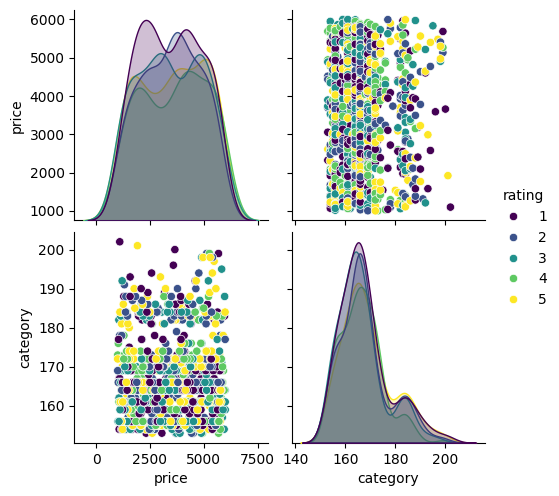

In [32]:
from seaborn import pairplot
import matplotlib.pyplot as plt

pairplot(df_rating, hue="rating", palette="viridis")
plt.show()

### É isso ai, aonde tem mais livros tem mais rating, hehehe.
Não consegui pensar em nada bom pra fazer o predict desse modelo.